###**Model calculation: Coherent mixing between quantum states**
  
> This code can be used to reproduce the data plotted in Figure 59 of Schultz et al., Coherence in chemistry: foundations and frontiers. *Chem. Revs.* (submitted)

To begin, press the play button beside each cell (proceed sequentially through the cells).

In [ ]:
#@title Import libraries, prep plot settings

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import *
import cmath
from scipy import linalg
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

def SwapCol(arr, start_index, last_index):
    arr[:, [start_index, last_index]] = arr[:, [last_index, start_index]]
    return arr.copy()

def SwapRow(arr, start_index, last_index):
    arr[[start_index, last_index],:] = arr[[last_index, start_index],:]
    return arr.copy()

def normalize(arr):
    return arr.copy()/np.amax(arr)

In [ ]:
#@title Tunable parameters

EG = 0
Ea = 10
Eb = 8
Ec = 6
V = 1

In [ ]:
#@title Create and diagonalize Hamiltonian

H = np.array([[EG, 0, 0, 0], [0, Ea, V, 0], [0, V, Eb, V], [0, 0, V, Ec]], dtype='float')
Fock = np.identity(len(H))
df_H = pd.DataFrame(normalize(H))
df_Fock = pd.DataFrame(Fock)

eigval, eigvec = linalg.eigh(H.copy())

eigval_org = SwapRow(SwapCol(np.diag(eigval.copy()),1,3),1,3)
eigvec_org = SwapCol(eigvec.copy(),1,3)

df_eigval = pd.DataFrame(normalize(eigval_org))
df_eigvec = pd.DataFrame(eigvec_org)

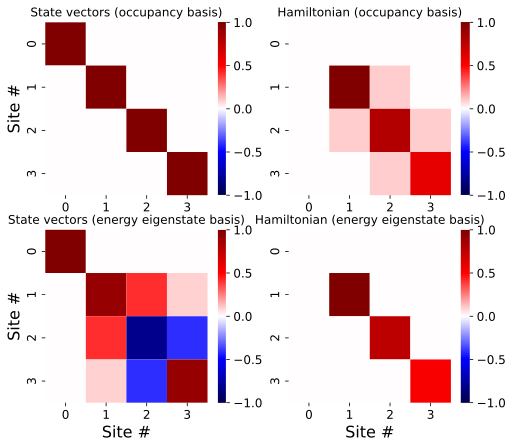

In [ ]:
#@title Visualize matrices

fig = plt.figure(figsize=(8,7))

ax = fig.add_subplot(2, 2, 1)
ax = sns.heatmap(df_Fock,cmap='seismic',vmin=-1, vmax=1)
plt.title("State vectors (occupancy basis)")
plt.ylabel("Site #")

ax = fig.add_subplot(2, 2, 2)
ax = sns.heatmap(df_H,cmap='seismic',vmin=-1, vmax=1)
plt.title("Hamiltonian (occupancy basis)")

ax = fig.add_subplot(2, 2, 3)
ax = sns.heatmap(df_eigvec,cmap='seismic',vmin=-1, vmax=1)
plt.title("State vectors (energy eigenstate basis)")
plt.ylabel("Site #")
plt.xlabel("Site #")

ax = fig.add_subplot(2, 2, 4)
ax = sns.heatmap(df_eigval,cmap='seismic',vmin=-1, vmax=1)
plt.title("Hamiltonian (energy eigenstate basis)")
plt.xlabel("Site #")

plt.savefig("output.svg")


In [ ]:
#@title Define projection function

def  proj_gen(eigvec,fock):

    fock_a = fock[1].copy()
    fock_b = fock[2].copy()
    fock_c = fock[3].copy()

    a_frac = np.abs(np.matmul(eigvec.transpose(),fock_a))
    b_frac = np.abs(np.matmul(eigvec.transpose(),fock_b))
    c_frac = np.abs(np.matmul(eigvec.transpose(),fock_c))


    normval = a_frac+b_frac+c_frac
    a_percent = 100*a_frac/normval
    b_percent = 100*b_frac/normval
    c_percent = 100*c_frac/normval
    check = a_percent+b_percent+c_percent

    return a_percent, b_percent, c_percent, check

In [ ]:
#@title Decompose eigenstates

a = []
b = []
c = []
tot = []

for i in range(3):
  a_percent, b_percent, c_percent, check = proj_gen(eigvec_org[i+1],Fock)
  a.append(a_percent)
  b.append(b_percent)
  c.append(c_percent)
  tot.append(check)

print("Eigenstate compositions are as follows:")
print("(numbers = those from the above graph + 1)")
print("----------------")

for i in range(3):
  print("Eigenstate "+ str(i+2) + ":")
  print(str(round(a[i])) + "% state a")
  print(str(round(b[i])) + "% state b")
  print(str(round(c[i])) + "% state c")
  print("---------------")



Eigenstate compositions are as follows:
(numbers = those from the above graph + 1)
----------------
Eigenstate 2:
64% state a
29% state b
7% state c
---------------
Eigenstate 3:
25% state a
50% state b
25% state c
---------------
Eigenstate 4:
7% state a
29% state b
64% state c
---------------
